# Untersuchung eines IMDB Datensatzes

Im Folgenden wird ein IMDB Datesantz untersucht. 
Unter anderem werden folgende Fragen beantwortet.
- Gibt es besonders gut bewertete Film Genres?
- Sind ätere Filme beliebter?
- Wie wirken sich Veröffentlichungsjahr des Filmes und Genre in Abhänggkeit auf die Bewertungen aus?
- Gibt es Länder die Filme durschnittlich besonders gut bewerten?
...

Erwartungshaltung:
Unsere Erwartungshaltung vertritt die Meinung, dass bestimmte Film Genren besser als andere bewertet wurden.
Außerdem nehmen wir an, dass ältere Filme besser bewertet wurden, da die Menschen damals nicht so hohe Erwartungshaltungen an Filme hatten wie es heute der Fall ist.
Auch ist es vorstellbar, dass kleinere Länder durchschnittlich die Filme besser bewerten, da nicht so viele Menschen in dem Land leben.

Importing the necessary libraries for data visualization and analysis

In [3]:
import seaborn as sns # Seaborn is a data visualization library based on matplotlib, provides beautiful default styles and color palettes
import matplotlib.pyplot as plt # Matplotlib is a data visualization library in Python, used to create interactive plots and charts
import pandas as pd # Pandas is a library for data manipulation and analysis
import numpy as np # NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices

Reading the movie data from a CSV file into a pandas dataframe

In [4]:
#Reading the movie data from a CSV file into a pandas dataframe
df = pd.read_csv('movies_initial.csv')

#Filtering out movies with less than 1000 votes on IMDB
df = df[df["imdbVotes"] >= 1000]

#Displaying the head of the filtered dataframe
df.head()

imdbID                                  title  year     rating runtime  \
0       1                             Carmencita  1894  NOT RATED   1 min   
1       5                       Blacksmith Scene  1893    UNRATED   1 min   
4      10  Employees Leaving the Lumi�re Factory  1895        NaN   1 min   
5      12                 The Arrival of a Train  1896        NaN   1 min   
6      14          Tables Turned on the Gardener  1895        NaN   1 min   

                genre    released                        director writer  \
0  Documentary, Short         NaN            William K.L. Dickson    NaN   
1               Short  1893-05-09            William K.L. Dickson    NaN   
4  Documentary, Short  1895-03-22                   Louis Lumi�re    NaN   
5  Documentary, Short  1896-01-01  Auguste Lumi�re, Louis Lumi�re    NaN   
6       Comedy, Short         NaN                   Louis Lumi�re    NaN   

                           cast  ...  imdbRating  imdbVotes  \
0                    Carmencita  ...         5.9     1032.0   
1      Charles Kayser, John Ott  ...         6.2     1189.0   
4                           NaN  ...         6.9     3469.0   
5                           NaN  ...         7.3     5043.0   
6  Fran�ois Clerc, Beno�t Duval  ...         7.1     2554.0   

                                              poster  \
0  https://m.media-amazon.com/images/M/MV5BMjAzND...   
1                                                NaN   
4                                                NaN   
5  https://m.media-amazon.com/images/M/MV5BMjEyND...   
6                                                NaN   

                                                plot  \
0  Performing on what looks like a small wooden s...   
1  Three men hammer on an anvil and pass a bottle...   
4  A man opens the big gates to the Lumi�re facto...   
5  A group of people are standing in a straight l...   
6  A gardener is watering his flowers, when a mis...   

                                            fullplot language country  awards  \
0  Performing on what looks like a small wooden s...      NaN     USA     NaN   
1  A stationary camera looks at a large anvil wit...      NaN     USA  1 win.   
4  A man opens the big gates to the Lumi�re facto...      NaN  France     NaN   
5  A group of people are standing in a straight l...      NaN  France     NaN   
6  A gardener is watering his flowers, when a mis...      NaN  France     NaN   

                     lastupdated   type  
0  2015-08-26 00:03:45.040000000  movie  
1  2015-08-26 00:03:50.133000000  movie  
4  2015-08-26 00:03:56.603000000  movie  
5  2015-08-15 00:02:53.443000000  movie  
6  2015-08-12 00:06:18.237000000  movie  

[5 rows x 21 columns]

Generating descriptive statistics for the filtered movie dataset

In [5]:
df.describe() #This function provides a statistical summary of the numerical columns in the dataframe, including count, mean, standard deviation, minimum and maximum values, as well as percentiles

imdbID   metacritic    imdbRating     imdbVotes
count  2.214200e+04  7692.000000  22142.000000  2.214200e+04
mean   6.323814e+05    56.598284      6.496712  2.322801e+04
std    8.107426e+05    18.004372      1.182726  6.790026e+04
min    1.000000e+00     1.000000      1.200000  1.000000e+03
25%    8.884775e+04    44.000000      5.800000  1.805000e+03
50%    2.391470e+05    57.000000      6.700000  3.831000e+03
75%    1.029130e+06    70.000000      7.300000  1.311800e+04
max    4.727512e+06   100.000000      9.600000  1.521105e+06

Checking the data types of each column in the dataframe

In [6]:
df.dtypes #This function returns the data type of each column in the dataframe, which is useful for checking whether any columns need to be converted to a different data type before further analysis or visualization.

imdbID           int64
title           object
year            object
rating          object
runtime         object
genre           object
released        object
director        object
writer          object
cast            object
metacritic     float64
imdbRating     float64
imdbVotes      float64
poster          object
plot            object
fullplot        object
language        object
country         object
awards          object
lastupdated     object
type            object
dtype: object

Visualizing the number of missing values in each column of the movie dataset

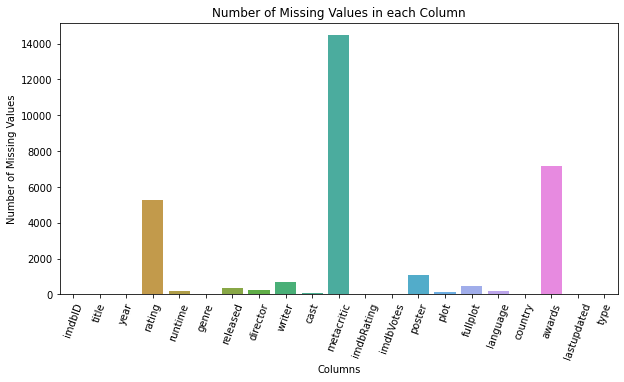

In [7]:
# In this code cell, we use Seaborn and Matplotlib libraries to visualize the number of missing values in each column of the filtered movie dataset.

import seaborn as sns  
import matplotlib.pyplot as plt 
# Counting the number of missing values in each column of the dataframe

missing_vals = df.isnull().sum()

# Creating a bar plot to show the number of missing values in each column

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=missing_vals.index, y=missing_vals.values)

# Adding labels and title to the plot

plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in each Column')

# Rotating the x-axis labels to improve readability

for item in ax.get_xticklabels():
    item.set_rotation(70)

# Displaying the plot

plt.show()

Data Visualization: Unique Values in Movie Dataset

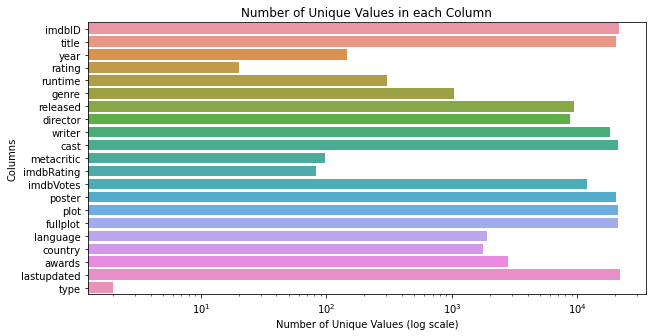

In [8]:
# Counting the number of unique values in each column of the dataframe

unique_vals = df.nunique()

# Creating a horizontal bar plot to show the number of unique values in each column

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=unique_vals.values, y=unique_vals.index, orient='horizontal')

# Setting the x-axis scale to logarithmic scale for improved visualization

ax.set_xscale('log')

# Adding labels and title to the plot

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values (log scale)')
plt.title('Number of Unique Values in each Column')

# Displaying the plot

plt.show()

Data Visualization: Distribution of IMDB Ratings

Als erstes Erfolgt eine Untersuchung der Ratings im allgemeinen.


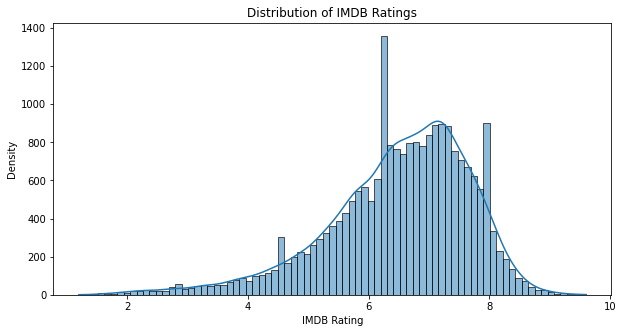

In [9]:
# Selecting the rows where 'imdbRating' column is not null
df_filt = df[df['imdbRating'].notnull()]

# Creating a figure with a larger width
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the distribution of the 'imdb_rating' column using Seaborn's histplot function
sns.histplot(data=df_filt, x="imdbRating", kde=True, ax=ax)

# Adding labels and title to the plot
plt.xlabel('IMDB Rating')
plt.ylabel('Density')
plt.title('Distribution of IMDB Ratings')

# Displaying the plot
plt.show()

Der Plot zeigt die Verteilung der IMDB-Bewertungen für eine bestimmte Datenmenge. 
Die x-Achse zeigt die möglichen Bewertungen von 0 bis 10, und die y-Achse zeigt die Dichte, 
also wie häufig eine bestimmte Bewertung vorkommt. 
Die blaue Kurve ist eine Dichteschätzung,
die eine geglättete Version der Verteilung darstellt.
Die meisten Filme haben eine mittlere bis hohe Bewertung mit einem auffallendem Peak bei ca. 6.3. Die nachfolgende Untersuchung schauen sich das Zustandekommen der Bewertungen etwas genauer an. 

Als erste denkbare Dimension wäre ein Einfluss des Filmgenre auf die Bewertung des Films. 

Gibt es besonders gut bewertete Genres? 

In [11]:
# Counting the number of movies in each IMDB rating category and sorting them in ascending order
value_counts = df['imdbRating'].value_counts().sort_index()

# Printing the value counts of each IMDB rating category
value_counts

1.2    1
1.5    3
1.6    7
1.7    6
1.8    6
      ..
9.2    9
9.3    3
9.4    2
9.5    2
9.6    1
Name: imdbRating, Length: 83, dtype: int64

In [12]:
# Counting the number of movies in each genre category and sorting them in descending order
genre_value_counts = df['genre'].value_counts()
genre_value_counts = genre_value_counts.sort_values(ascending=False)

# Displaying the top 10 genres with highest number of movies
genre_value_counts.head(10)

Drama                     1774
Comedy                    1149
Comedy, Drama              873
Drama, Romance             806
Comedy, Drama, Romance     754
Comedy, Romance            605
Horror                     465
Action, Crime, Drama       414
Horror, Thriller           388
Documentary                346
Name: genre, dtype: int64

Violin Plot of IMDB Ratings by Genre (Top 10 by occurrence in Dataset)

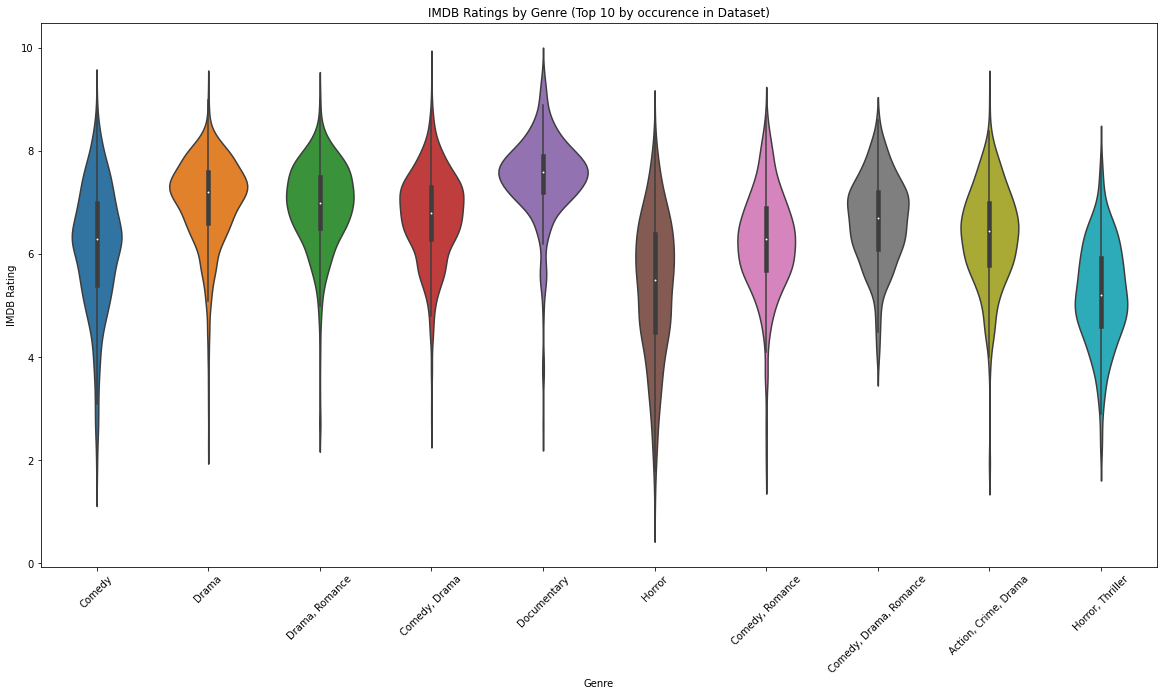

In [13]:
# Counting the number of movies in each genre category and sorting them in descending order
value_counts = df['genre'].value_counts()

# Selecting the top 10 genres based on number of movies
top_genres = value_counts.head(10).index.tolist()

# Filtering the dataset to include only movies with top 10 genres
df_top_genres = df[df['genre'].isin(top_genres)]

# Creating a violin plot to show the distribution of IMDB ratings for each top genre
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="genre", y="imdbRating", data=df_top_genres, ax=ax, showmedians=True)

# Adding labels and title to the plot
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings by Genre (Top 10 by occurence in Dataset)')

# Rotating the x-axis labels to prevent overlap
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

Der Plot zeigt die Verteilung der IMDB-Bewertungen für die 10 häufigsten Genres in der Datenmenge. Die x-Achse zeigt die verschiedenen Genres, und die y-Achse zeigt die möglichen Bewertungen von 0 bis 10. Die Violinen, zeigen die Dichte der Bewertungen für jedes Genre an. Die weißen Punkte sind die Mittelwerte.

Eine mögliche Interpretation des Plots ist, dass Dokumentarfilme tendenziell höhere Bewertungen haben als andere Genres, mit einem Mittelwert von etwa 7.5 und einer schmalen Verteilung. Horror- und Komödienfilme haben dagegen tendenziell niedrigere Bewertungen, mit einem Mittelwert um 6 und einer breiten Verteilung. Dies könnte darauf hindeuten, dass diese Genres mehr subjektive oder polarisierende Meinungen hervorrufen. Die anderen Genres haben allgemein geringere Verteilungswerte was sich in der Breite der Violinen bemerkbar macht.

Hat das Jahr der Filmveröffentlichung einen Einfluss auf die Bewertung? Sind ältere Filme bei Liebhabern ebentuell beliebter, was eine bessere Bewertung dieser als Folge hat?

Plotting the Mean IMDB Rating by Year

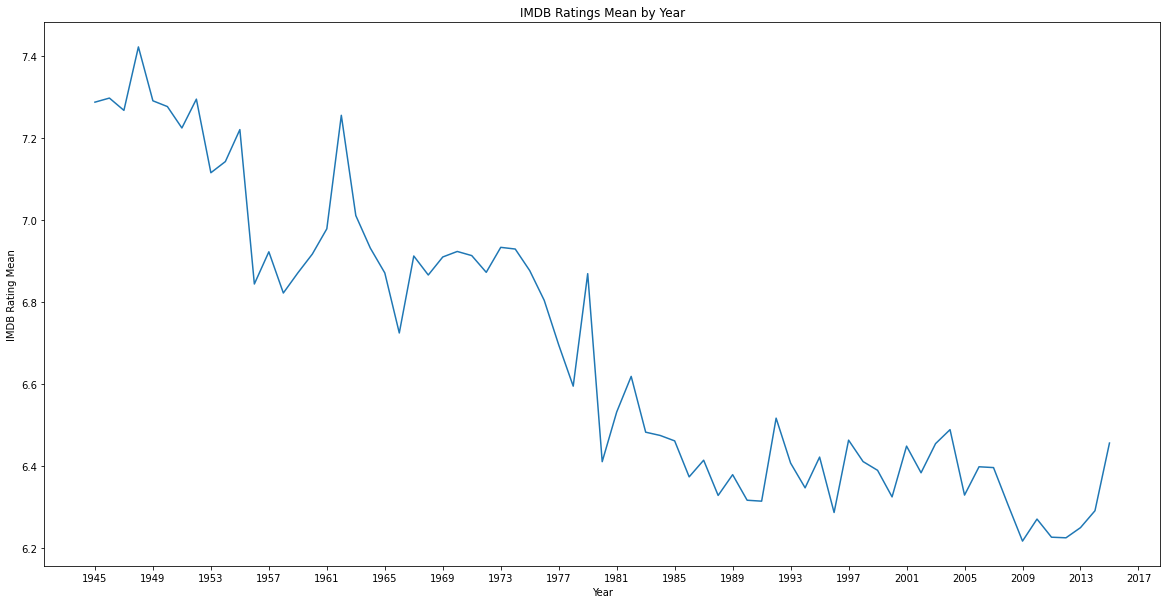

In [20]:
# Filtering out the rows where imdbRating is not available and year is between 1945 and 2016
df_mean = df[df['imdbRating'].notna()]
df_mean = df_mean.where(df_mean["year"]>=1945)
df_mean = df_mean.where(df_mean["year"]<=2016)

# Grouping the dataframe by year and computing the mean of imdbRating for each year
df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()

# Create a line plot to visualize the trend of mean imdbRating over time
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="year", y="imdbRating", data=df_mean, ax=ax)

# Add labels and set the x-axis tick marks and labels
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.show()


Der Plot zeigt den Trend der durchschnittlichen IMDB-Bewertung für Filme, die zwischen 1945 und 2015 veröffentlicht wurden. Die x-Achse zeigt die Jahre, und die y-Achse zeigt die durchschnittliche Bewertung vom Minimum des jährlichen Durchschnitts bis zum Maximum. Die blaue Linie symbolisiert den Mittelwert für das jeweilige Jahr.

Eine mögliche Interpretation ist, dass die durchschnittliche IMDB-Bewertung im Laufe der Zeit leicht gesunken ist, mit einigen Schwankungen z.B. in den 60er Jahren. Die höchste durchschnittliche Bewertung wurde 1949 erreicht, mit etwa 7,4. Die niedrigste durchschnittliche Bewertung wurde 2009 erreicht, mit etwa 6,3. Dies könnte darauf hindeuten, dass die Qualität oder die Erwartungen der Filme sich im Laufe der Zeit verändert haben. Es könnte aber auch andere Faktoren geben, die die Bewertungen beeinflussen, wie zum Beispiel die Anzahl oder die Auswahl der Filme pro Jahr.

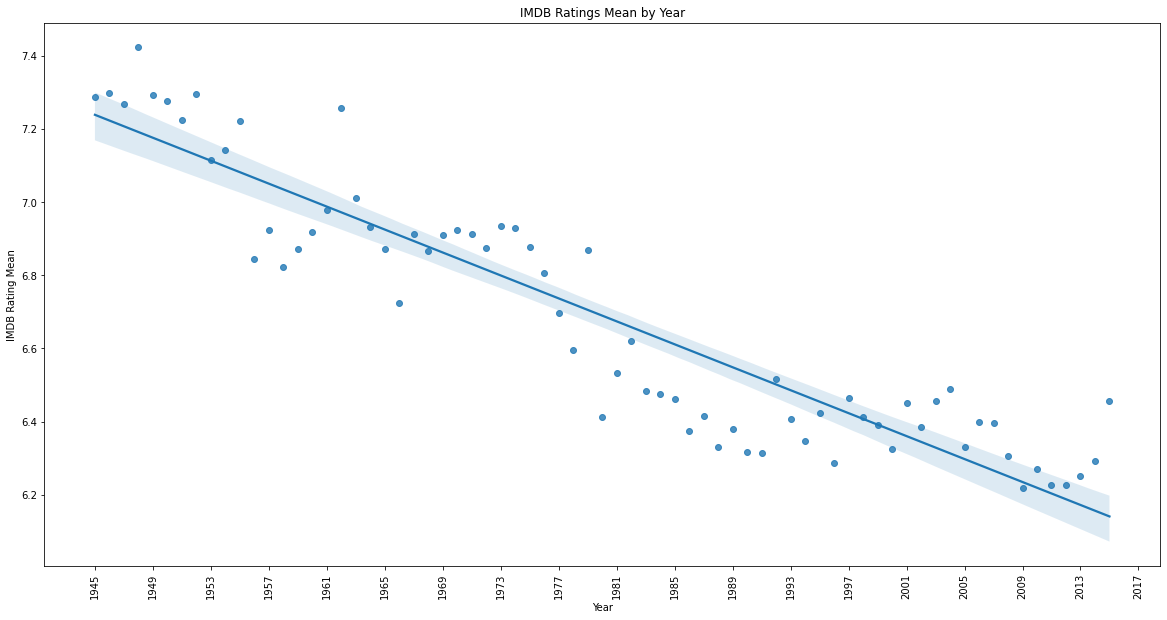

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

# Create the regression plot
sns.regplot(x="year", y="imdbRating", data=df_mean, ax=ax)

# Add labels
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')

# Set the x-axis ticks and tick labels
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Rotate the x-axis tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

# Display the plot
plt.show()

Der Plot zeigt den Trend der durchschnittlichen IMDB-Bewertung für Filme.. Die x-Achse zeigt die Jahre, und die y-Achse zeigt die durchschnittliche Bewertung. Die blaue Linie ist eine Regressionslinie, die die beste Anpassung an die Datenpunkte darstellt. Dies ist im Endeffekt nur eine andere Darstellung der obigen Linie. 

Plotting the Number of Top 250 Movies by Year

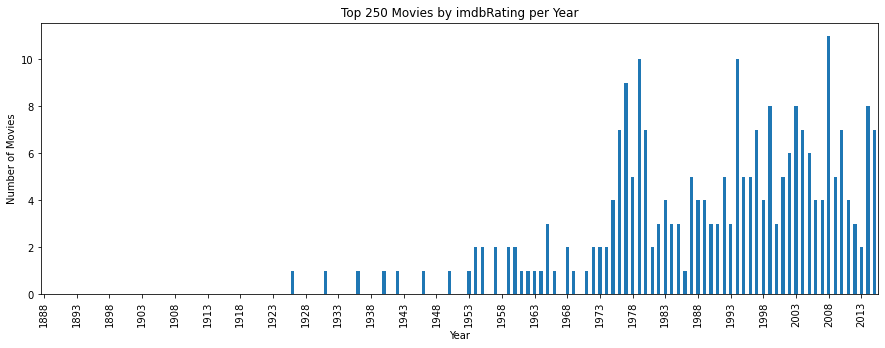

In [21]:
# Create a DataFrame of the top 250 movies by IMDB rating
df_top_250 = df.nlargest(250, 'imdbRating')

# Convert the year column to integers
df_top_250['year'] = df_top_250['year'].astype(int)

# Create a list of years to plot
years = range(int(df['year'].min()), int(df['year'].max())+1)

# Create a DataFrame with year as the index and count of movies as the values
df_years = pd.DataFrame({'year': years})
df_years['count'] = 0
df_years = df_years.set_index('year')

# Count the number of movies in each year
for year, group in df_top_250.groupby(['year']):
    df_years.loc[year, 'count'] = len(group)

# Plot the bar chart
df_years['count'].plot(kind='bar', figsize=(15, 5))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 250 Movies by imdbRating per Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

Der Plot zeigt die Anzahl der Filme, die zu den Top 250 Filmen nach IMDB-Bewertung gehören. Die x-Achse zeigt die Jahre, und die y-Achse zeigt die Anzahl der Filme. Die blauen Balken sind die Anzahl der Filme pro Jahr.
Hier sieht man aber, dass die Top 250 Filme eher aktuellere Filme sind. Dies steht im Kontrast zu unserem vorherigen Plot. Eine mögliche Erklärung ist, dass die Filme, die früher veröffentlicht wurden, eine kleinere oder selektivere Gruppe von Nutzern hatten, die sie bewertet haben. Diese Nutzer könnten eher dazu neigen, Filme zu bewerten, die sie sehr gut finden, und Filme zu ignorieren, die sie nicht mögen oder nicht kennen. Dies könnte zu einem höheren Mittelwert der Bewertungen führen. Die Filme, die später veröffentlicht wurden, könnten eine größere oder diversere Gruppe von Nutzern haben, die sie bewertet haben. Diese Nutzer könnten eher dazu neigen, Filme zu bewerten, die sie sowohl gut als auch schlecht finden, oder Filme, die sie zufällig gesehen haben. Dies könnte zu einem niedrigeren Mittelwert der Bewertungen führen.


Exkurs:

Creating an interactive bar plot of Top 250 Movies by Year using Plotly Express

In [22]:
import plotly.express as px

# Create a bar chart with 'year' on the x-axis and 'imdbRating' on the y-axis
# Use the 'color' parameter to color-code the bars by 'imdbRating'
# Use the 'hover_data' parameter to include 'imdbVotes' as additional information when hovering over the bars
# Use the 'hover_name' parameter to display the 'imdbVotes' value when hovering over the bars
# Set the chart title
fig = px.bar(df_top_250, x='year', y='imdbRating', color='imdbRating',
             hover_data=['imdbVotes'],
             hover_name='imdbVotes',
             title="Top 250 movies distributed by year")

# Use the 'update_traces' method to add 'title' as an additional text to display when hovering over the bars
fig.update_traces(
                  hovertext=df_top_250['title'])

# Use the 'update_layout' method to hide the y-axis tick labels
fig.update_layout(
    yaxis=dict(
        showticklabels=False
    )
)

# Show the chart
fig.show()

Der Plot zeigt die Verteilung der Top 250 Filme nach IMDB-Bewertung über die Jahre. Die x-Achse zeigt die Jahre, und die y-Achse zeigt die IMDB-Bewertung von 0 bis 10. Die Balken sind nach der IMDB-Bewertung farbcodiert, wobei dunklere Farben höhere Bewertungen anzeigen. Wenn man mit der Maus über die Balken fährt, sieht man zusätzliche Informationen wie den Titel, die Anzahl der IMDB-Stimmen und den Wert der IMDB-Bewertung für jeden Film.
Da einige der Filme sehr wenige Bewertungen haben, werden im nachfolgendem Filme <25000 Bewertungen ausgefiltert.

Plotting Top Movies by Year with a Minimum Number of Votes

In [23]:
import plotly.express as px

# Select the top 250 movies by imdbRating
df_top_250 = df.nlargest(250, 'imdbRating')

# Convert year to integer
df_top_250['year'] = df_top_250['year'].astype(int)

# Filter out movies with less than 25000 votes
df_top_250 = df_top_250[df_top_250["imdbVotes"] >= 25000]

# Create a bar chart with year on x-axis, imdbRating on y-axis, and color-coded by imdbRating
fig = px.bar(df_top_250, x='year', y='imdbRating', color='imdbRating',
             hover_data=['imdbVotes'], hover_name='imdbVotes',
             title="Top movies distributed by year (Real popular movies by no of votes)")

# Add movie title to hovertext
fig.update_traces(hovertext=df_top_250['title'])

# Remove y-axis tick labels
fig.update_layout(yaxis=dict(showticklabels=False))

# Show the plot
fig.show()

Um eine Verbindung der Genre-Bewertung und der Jahresbetrachtung zu erstellen, wird nun der oben bereits dargestellte Scatter-Plot auf Genres aufgeteilt. 

Analyzing IMDB Ratings by Genre and Year

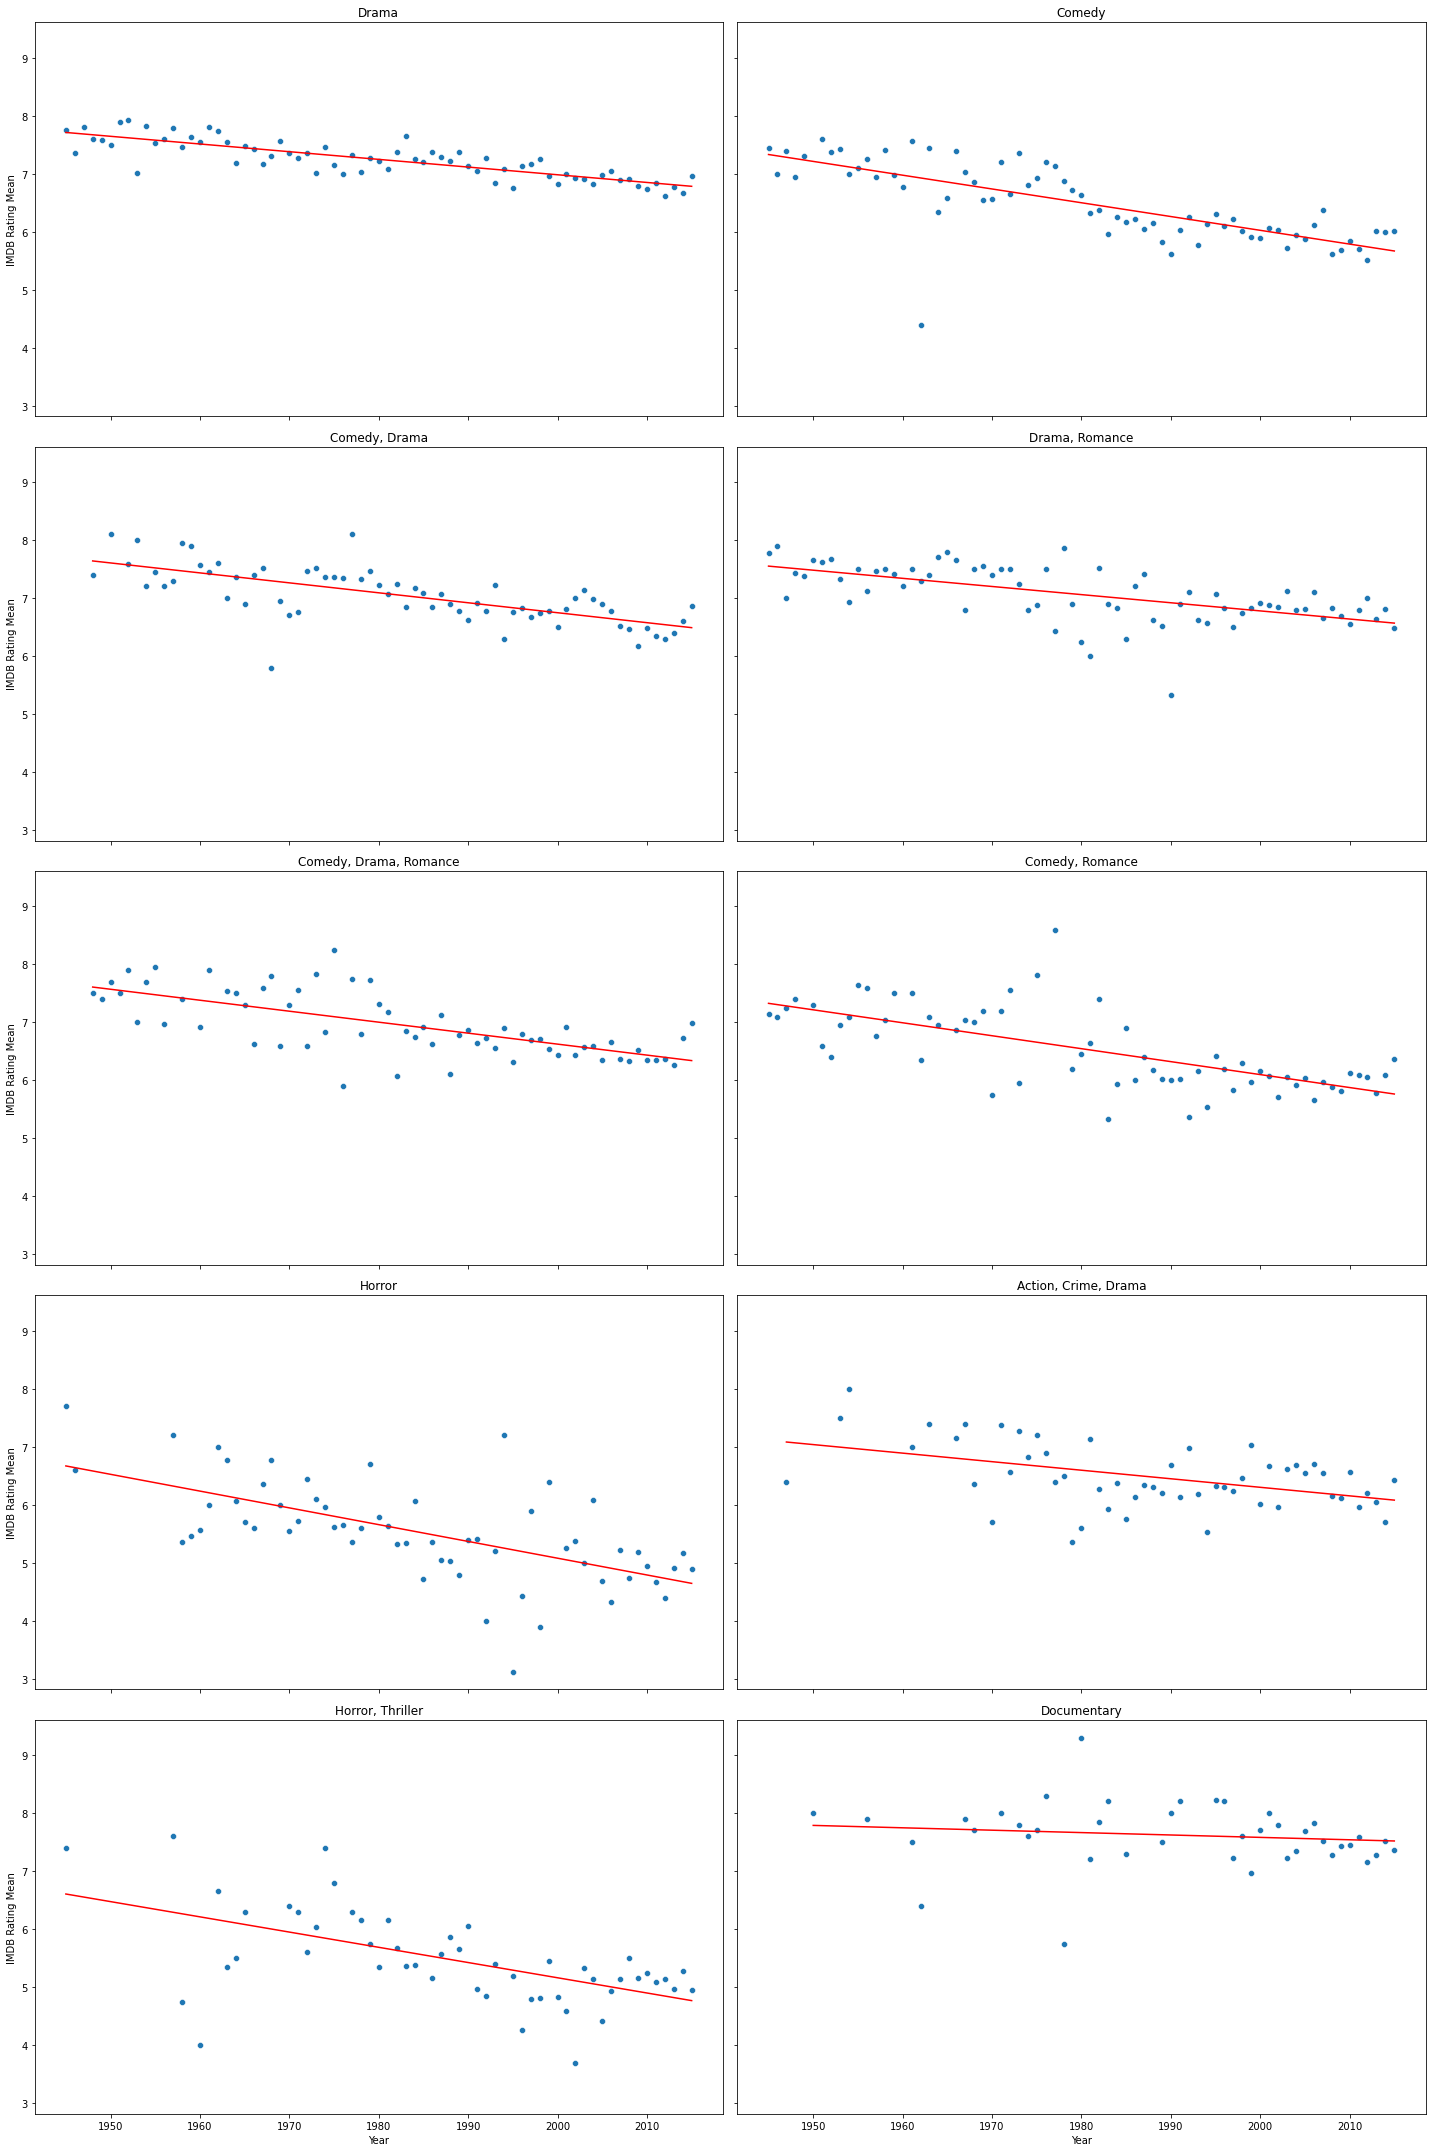

In [26]:
import scipy

# Get the top 10 most common genres
genre_counts = df["genre"].value_counts().head(10)
genres = genre_counts.index.tolist()

# Create a grid of subplots for each genre
fig, ax = plt.subplots(5, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = ax.flatten()

# Loop through each genre and plot its mean IMDb rating over time
for i, genre in enumerate(genres):
    # Filter the data to only include rows for the current genre
    df_genre = df[df["genre"] == genre]
    
    # Filter out rows with missing IMDb ratings and limit the year range
    df_mean = df_genre[df_genre['imdbRating'].notna()]
    df_mean = df_mean.where(df_mean["year"]>=1945)
    df_mean = df_mean.where(df_mean["year"]<=2016)
    
    # Calculate the mean IMDb rating for each year
    df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()
    
    # Create a scatter plot of the mean ratings over time
    sns.scatterplot(x="year", y="imdbRating", data=df_mean, ax=ax[i])
    
    # Add a red line to represent the linear regression line
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_mean["year"], df_mean["imdbRating"])
    x = df_mean["year"]
    y = slope * x + intercept
    ax[i].plot(x, y, color="red")

    # Set the subplot title and axis labels
    ax[i].set_title(genre)
    if i == 8 or i == 9:
        ax[i].set_xlabel("Year")
    if i == 0 or i == 2 or i == 4 or i == 6 or i == 8:
        ax[i].set_ylabel("IMDB Rating Mean")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Der Plot zeigt die Verteilung der durchschnittlichen IMDB-Bewertung für die 10 häufigsten Genres in der Datenmenge über die Jahre. Die x-Achse zeigt die Jahre, und die y-Achse zeigt die durchschnittliche Bewertung. Die blauen Punkte sind die Mittelwerte für jedes Jahr, und die roten Linien sind die Regressionslinien, die den Trend anzeigen.
Eine mögliche Interpretation des Plots ist, dass die meisten Genres einen negativen Zusammenhang zwischen dem Jahr und der durchschnittlichen IMDB-Bewertung zeigen. Dieser Trend war auch vorhin schon auf alle Genres bezogen zu sehen. Interessant ist, dass es kein einziges Genre unter den 10 gibt, welches über die Jahre eine steigende Trendlinie hat.  Der einzige "Ausreißer" ist das Genre Dokumentarfilm, das einen sehr schwachen oder keinen Zusammenhang zwischen dem Jahr und der durchschnittlichen IMDB-Bewertung zeigt. Dies könnte darauf hindeuten, dass Dokumentarfilme eine konstante oder stabile Qualität oder Beliebtheit haben, oder dass sie weniger von den Veränderungen oder Trends in der Filmindustrie beeinflusst werden.

Wir haben festgestellt, dass die meisten Genres einen negativen Trend aufweisen, mit Ausnahme von Dokumentarfilmen. Genre-unabhängig ist der Trend ebenfalls negativ. Eine mögliche Frage, die sich daraus ergibt, ist, ob es einen Zusammenhang zwischen der Anzahl der IMDB-Stimmen und der IMDB-Bewertung gibt. Das heißt, ob Filme mit mehr Stimmen tendenziell höhere oder niedrigere Bewertungen haben als Filme mit weniger Stimmen

Scatter Plot and Correlation of IMDB Votes and Ratings

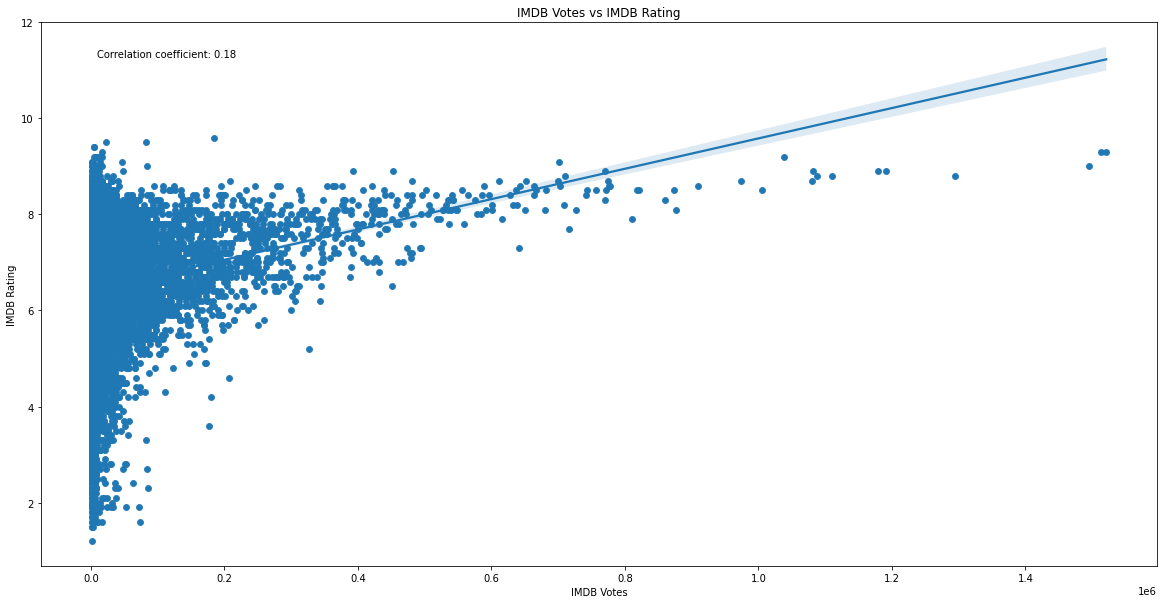

In [27]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Create a scatter plot of imdbVotes vs imdbRating
sns.scatterplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)

# Calculate the correlation coefficient between imdbVotes and imdbRating
correlation_coefficient = df['imdbVotes'].corr(df['imdbRating'])

# Create a regression plot of imdbVotes vs imdbRating
sns.regplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)

# Add text to the plot indicating the correlation coefficient
text = "Correlation coefficient: {:.2f}".format(correlation_coefficient)
ax.text(0.05, 0.95, text, transform=ax.transAxes, verticalalignment='top')

# Set the x and y axis labels and plot title
plt.xlabel('IMDB Votes')
plt.ylabel('IMDB Rating')
plt.title('IMDB Votes vs IMDB Rating')

# Show the plot
plt.show()

Ein Korrelationskoeffizient von 0,18 bedeutet, dass es einen schwachen positiven Zusammenhang zwischen den IMDB-Stimmen und der IMDB-Bewertung gibt. Das heißt, je mehr Stimmen ein Film hat, desto höher ist tendenziell seine Bewertung, aber der Effekt ist nicht sehr stark, worauf die 0,18 hindeutet. Ein perfekter Zusammenhang wäre die 1.

Scatter Plot of IMDB Votes vs IMDB Rating

In [30]:


# Creating a scatter plot using the 'px.scatter()' function
fig = px.scatter(x=df["imdbVotes"],
                 y=df["imdbRating"],
                 hover_data=[df["title"], df["imdbRating"], df["year"]])

# Updating the layout of the scatter plot using the 'update_layout()' function.

fig.update_layout(
    title="IMDB Votes vs IMDB Rating",
    xaxis_title="IMDB Votes",
    yaxis_title="IMDB Rating",
    font=dict(size=10),
    width=1000,
    height=800
)

# Displaying the scatter plot using the 'show()' function.
fig.show()

Data preprocessing steps for the "country" column

In [31]:
#Dropping rows with missing values in the "country" column
df = df.dropna(subset=['country'])
#Converting all country names to lowercase, removing leading/trailing whitespaces,
#and splitting countries listed in a single row into a list of individual countries
df['country'] = df['country'].str.lower().str.strip().str.split(',')
#Sorting the list of countries for each movie in alphabetical order
df['country'] = df['country'].apply(lambda x: sorted(x))
#Joining the list of individual countries back into a single string with commas separating them
df['country'] = df['country'].apply(lambda x: ','.join(x))

C:\Users\timos\AppData\Local\Temp\ipykernel_34676\3693464186.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\timos\AppData\Local\Temp\ipykernel_34676\3693464186.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\timos\AppData\Local\Temp\ipykernel_34676\3693464186.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Generating a bar chart to show the average IMDB rating by country

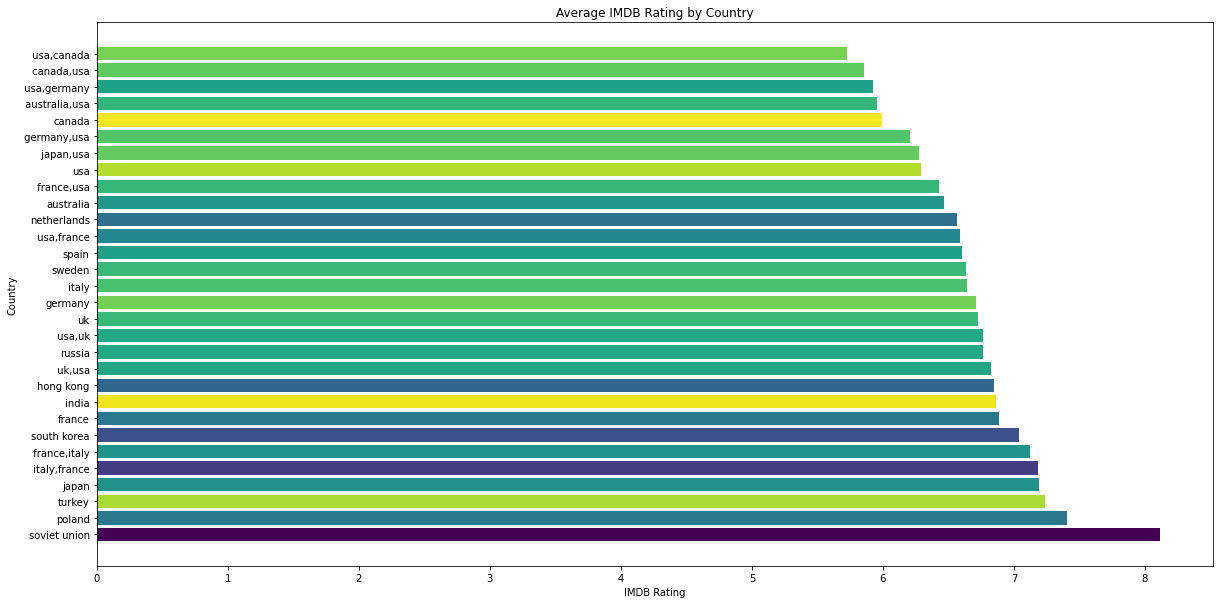

In [33]:
import matplotlib.cm as cm

#Filtering the top 30 countries with the most number of movies in the dataset
df_country = df['country'].value_counts().head(30)
top_countries = df_country.index.tolist()

#Selecting only the movies belonging to the top countries
df_top_countries = df[df['country'].isin(top_countries)]

#Calculating the average rating and standard deviation for each country
avg_rating = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()
std_dev = df_top_countries.groupby('country')['imdbRating'].std().reset_index()

#Merging the average rating and standard deviation for each country
avg_std = avg_rating.merge(std_dev, on='country')
avg_std = avg_std.sort_values(by='imdbRating_x', ascending=False)

#Creating a horizontal bar plot showing the average rating of each country, with color corresponding to standard deviation
plt.figure(figsize=(20, 10))
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=min(avg_std['imdbRating_y']), vmax=max(avg_std['imdbRating_y']))
colors = cmap(normalize(avg_std['imdbRating_y']))
plt.barh(avg_std['country'], avg_std['imdbRating_x'], color=colors)
plt.xlabel('IMDB Rating')
plt.ylabel('Country')
plt.title('Average IMDB Rating by Country')
plt.show()

 Laut der Grafik wurden Filme in der Soviet Union am Besten im Durchschnitt bewertet. Dies muss aber nicht bedeuten, dass die Filme in der Soviet Union allgemein besser bewertet wurden. Schließlich haben wir in der Analyse beretits gesehen, dass Film früher besser bewertet wurden als heute. Die Soviet Union wurde bereits im Jahre 1991 aufgelöst.

Visualizing the Average IMDB Rating per Country for the Top 30 Countries

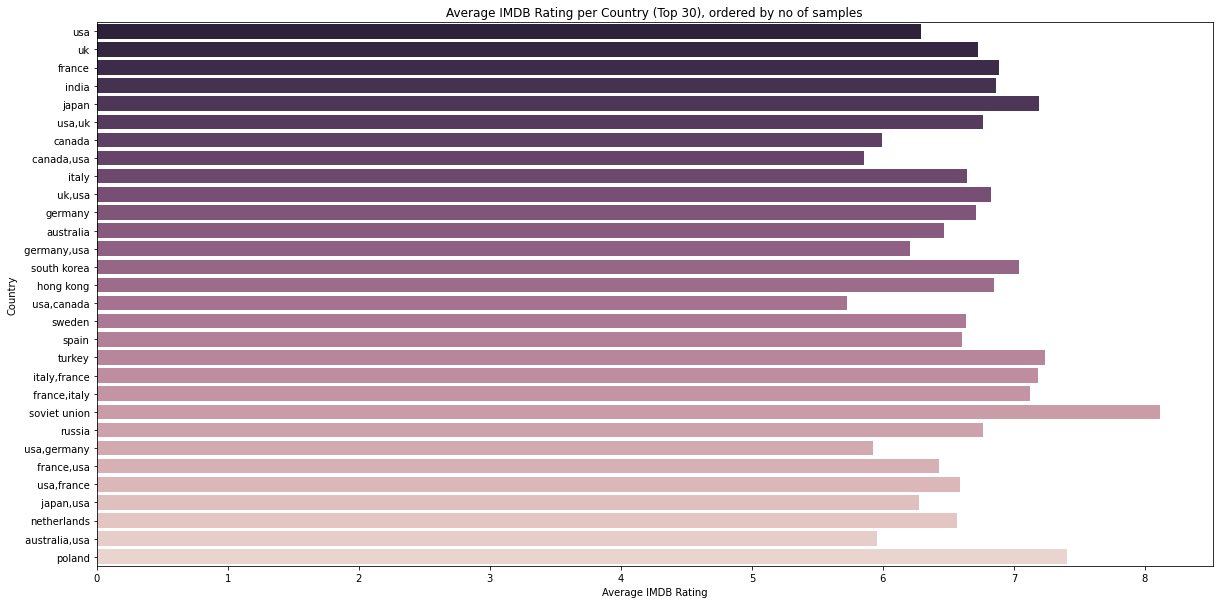

In [36]:
# Get the top 30 countries by value counts
df_country = df['country'].value_counts().head(30)

# Store the value counts in a separate dataframe
occurece_df = df_country

# Get a list of the top countries
top_countries = df_country.index.tolist()

# Filter the original dataframe to only include rows with countries in the top countries list
df_top_countries = df[df['country'].isin(top_countries)]

# Group by country and calculate the mean imdbRating for each country
df_country = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()

# Join the occurece_df to add the value counts as a new column
df_country = df_country.join(occurece_df, on=df_country["country"] , how='left', lsuffix='_left', rsuffix='_right')

# Sort the resulting dataframe by value counts in descending order
df_country.sort_values(by="country_right",inplace=True,ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Create a barplot of average imdbRating by country using seaborn
sns.barplot(x="imdbRating", y="country_left", data=df_country,palette=reversed(sns.cubehelix_palette(n_colors=len(df_country))))

# Set the x and y labels and title for the plot
plt.xlabel("Average IMDB Rating")
plt.ylabel("Country")
plt.title("Average IMDB Rating per Country (Top 30), ordered by no of samples")

# Show the plot
plt.show()

In [682]:
df["awards"].value_counts()

1 nomination.                                               1692
1 win.                                                       986
2 nominations.                                               691
1 win & 1 nomination.                                        627
3 nominations.                                               381
                                                            ... 
Nominated for 2 Oscars. Another 4 wins & 22 nominations.       1
19 wins & 8 nominations.                                       1
Nominated for 8 Oscars. Another 4 wins & 3 nominations.        1
Won 6 Oscars. Another 38 wins & 27 nominations.                1
Won 5 Oscars. Another 18 wins & 12 nominations.                1
Name: awards, Length: 2770, dtype: int64

Extracting the Total Number of Nominations and Wins from Awards Column

In [37]:
# Import regular expression module
import re

# Define a function to extract the total number of nominations and wins from a string
def extract_noms_and_wins(string):
    # Check if the input is a string
    if not isinstance(string, str):
        return 0
    # Use regular expression to find all integers in the string
    integers = re.findall(r'\d+', string)
    # Convert the list of strings to a list of integers
    integers = [int(i) for i in integers]
    # Return the sum of all integers in the list
    return sum(integers)

# Apply the function to the 'awards' column and store the result in a new column 'nomsandwins'
df['nomsandwins']= df['awards'].apply(extract_noms_and_wins)

C:\Users\timos\AppData\Local\Temp\ipykernel_34676\2946958012.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Visualizing the Posters of the Top 10 Movies by Number of Won and Nominated Prizes

Text(0.5, 0.93, 'Top Movies by number of Won and Nominated Prices:')

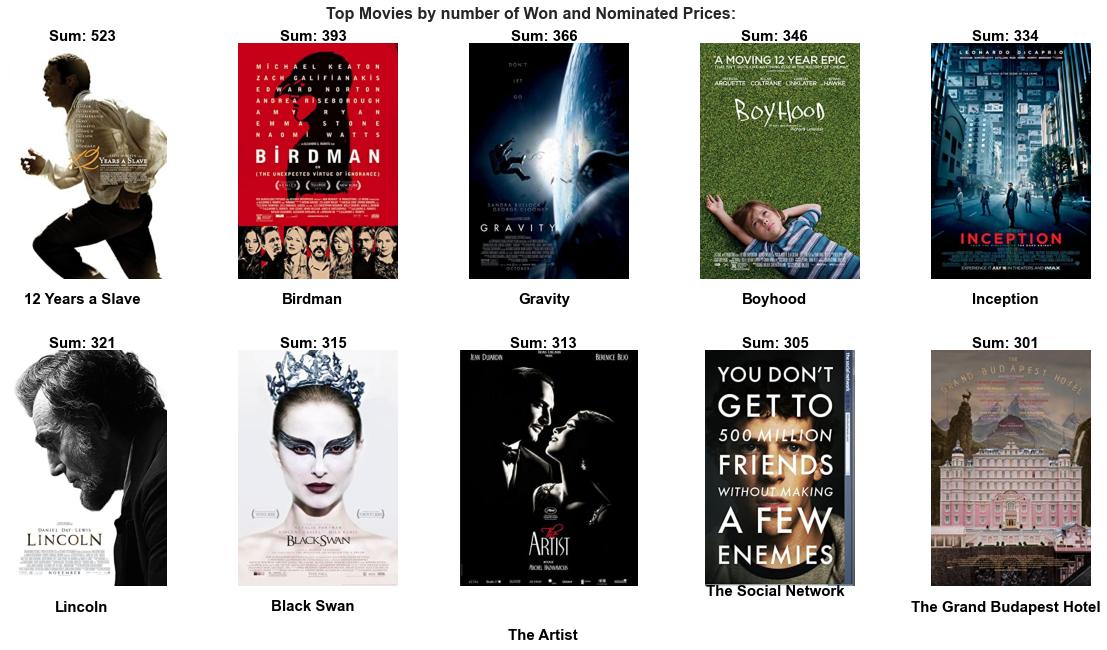

In [684]:


# Import urllib module
import urllib

# Remove rows with missing values in the 'poster' column
df_removed = df.dropna(subset=['poster'])

# Get the top 10 films based on the nomsandwins column
top_10 = df_removed.nlargest(11, 'nomsandwins')
top_10.drop_duplicates(inplace=True, subset=["title"])

# Create a list of the URLs for the top 10 films
poster_urls = top_10['poster'].tolist()

# Download the images and store them as arrays
images = []
for url in poster_urls:
    with urllib.request.urlopen(url) as url:
        image = plt.imread(url, format='jpeg')
        images.append(image)

# Create a 2x5 grid of subplots to display the images
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, image in enumerate(images):
    # Display the image in the subplot
    ax[i//5, i%5].imshow(image)
    # Turn off the axis for the subplot
    ax[i//5, i%5].axis('off')
   
    # Add text to display the sum of nominations and wins below each image
    ax[i//5, i%5].text(140, -5, "Sum: "+ str(top_10.iloc[i]['nomsandwins']), 
                      ha='center', fontsize=15, color='black', fontweight='bold')
    # Add text to display the title of the movie above each image
    ax[i//5, i%5].text(140, 490, top_10.iloc[i]['title'].split(":")[0].strip(), 
                      ha='center', fontsize=15, color='black', fontweight='bold')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Add a title for the entire figure
plt.suptitle("Top Movies by number of Won and Nominated Prices:", fontweight='bold', fontsize=16, y=0.93)

Visualizing the Number of Won and Nominated Prizes for the Top 10 Movies

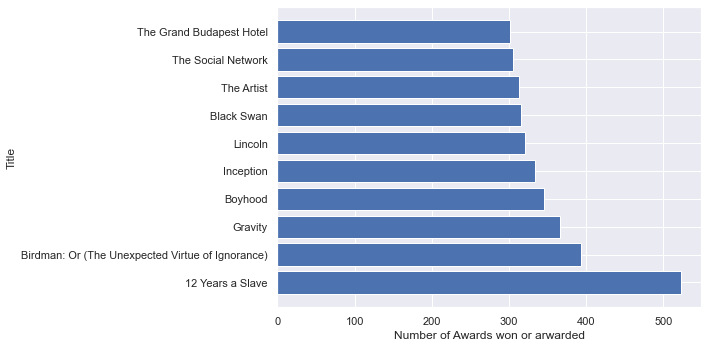

In [685]:
# Create a barplot of the nomsandwins column
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y=top_10['title'], width=top_10['nomsandwins'])

# Set the x and y labels for the plot
ax.set_ylabel("Title")
ax.set_xlabel("Number of Awards won or nominated")

# Adjust the layout of the plot
plt.tight_layout()

# Show the plot
plt.show()

Visualizing the Average Number of Nominated or Won Prizes per Country for the Top 30 Countries

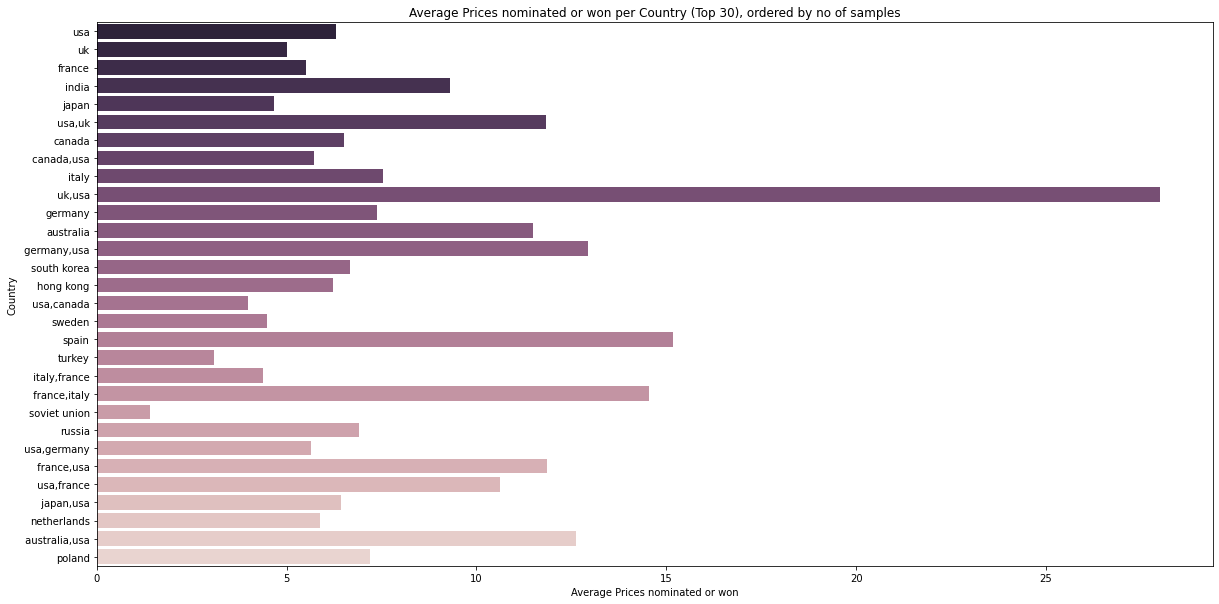

In [38]:
# Get the top 30 countries by value counts
df_country = df['country'].value_counts().head(30)

# Store the value counts in a separate dataframe
occurece_df = df_country

# Get a list of the top countries
top_countries = df_country.index.tolist()

# Filter the original dataframe to only include rows with countries in the top countries list
df_top_countries = df[df['country'].isin(top_countries)]

# Group by country and calculate the mean nomsandwins for each country
df_country = df_top_countries.groupby('country')['nomsandwins'].mean().reset_index()

# Join the occurece_df to add the value counts as a new column
df_country = df_country.join(occurece_df, on=df_country["country"] , how='left', lsuffix='_left', rsuffix='_right')

# Sort the resulting dataframe by value counts in descending order
df_country.sort_values(by="country_right",inplace=True,ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Create a barplot of average nomsandwins by country using seaborn
sns.barplot(x="nomsandwins", y="country_left", data=df_country,palette=reversed(sns.cubehelix_palette(n_colors=len(df_country))))

# Set the x and y labels and title for the plot
plt.xlabel("Average Prices nominated or won")
plt.ylabel("Country")
plt.title("Average Prices nominated or won per Country (Top 30), ordered by no of samples")

# Show the plot
plt.show()

Bringt man die durchschnittliche Beurteilung mit den nominierten Filmen für Preise in Verbindung, hatte Polen und die Soviet Union durchschnittlich am höchsten bewertete Filme. Die Filme aus Polen und der Soviet Union haben aber verhältnismäßig wenig nominierte Filme für Preise. Hier ist uk/usa an der Spitze. Dies lässt ebenfalls auf sehr subjektive Bewertungen schließen.

Creating a Word Cloud of the Full Plot for the Top 500 Films by IMDB Rating

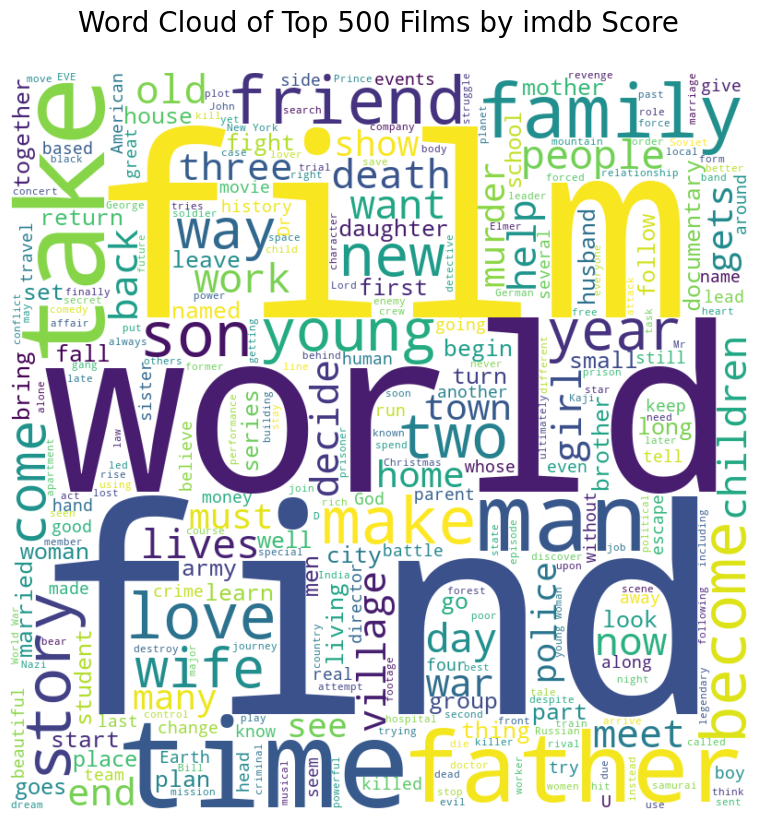

In [7]:
# Import necessary modules
from wordcloud import WordCloud, STOPWORDS

# Add additional stopwords to the set of stopwords
STOPWORDS.add("one")
STOPWORDS.add("life")
STOPWORDS.add("live")
STOPWORDS.add("will")

# Get the top 5000 films based on imdbRating
df_top_500 = df.nlargest(500, 'imdbRating')

# Remove rows with missing values in the 'fullplot' column
df_top_500 = df_top_500.dropna(subset=['fullplot'])

# Concatenate all fullplot strings into one long string
text = ' '.join(df_top_500['fullplot'].tolist())

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Generate a word cloud from the text
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=300,
                      min_font_size=10).generate(text)

# Set the figure size and facecolor for the plot
plt.figure(figsize=(8, 8), facecolor=None)

# Display the word cloud in the plot
plt.imshow(wordcloud, interpolation="bilinear")

# Turn off the axis for the plot
plt.axis("off")

# Add a title for the plot
plt.title("Word Cloud of Top 500 Films by imdb Score\n", fontsize=20)

# Adjust the layout of the plot
plt.tight_layout(pad=0)
plt.show()

Die Word Cloud für die Top 500 Filme nach IMDb Score sortiert, assoziiert hauptsächlich positive Wörter. Dies ist etwas verwunderlich - sind die Handlungsplots von Krimis, Action Flmen und Thrillern vermehrt positiv geschrieben? Sind diese Genre nicht so sehr in den Top 5000 gerateten Filmen erhalten?

Creating Word Clouds for the Full Plot of the Top 10 Genres of the Top 500 Films by IMDB Rating

C:\Users\linda\AppData\Local\Temp\ipykernel_9072\2809387378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['genre'] = df_filtered['genre'].str.strip()


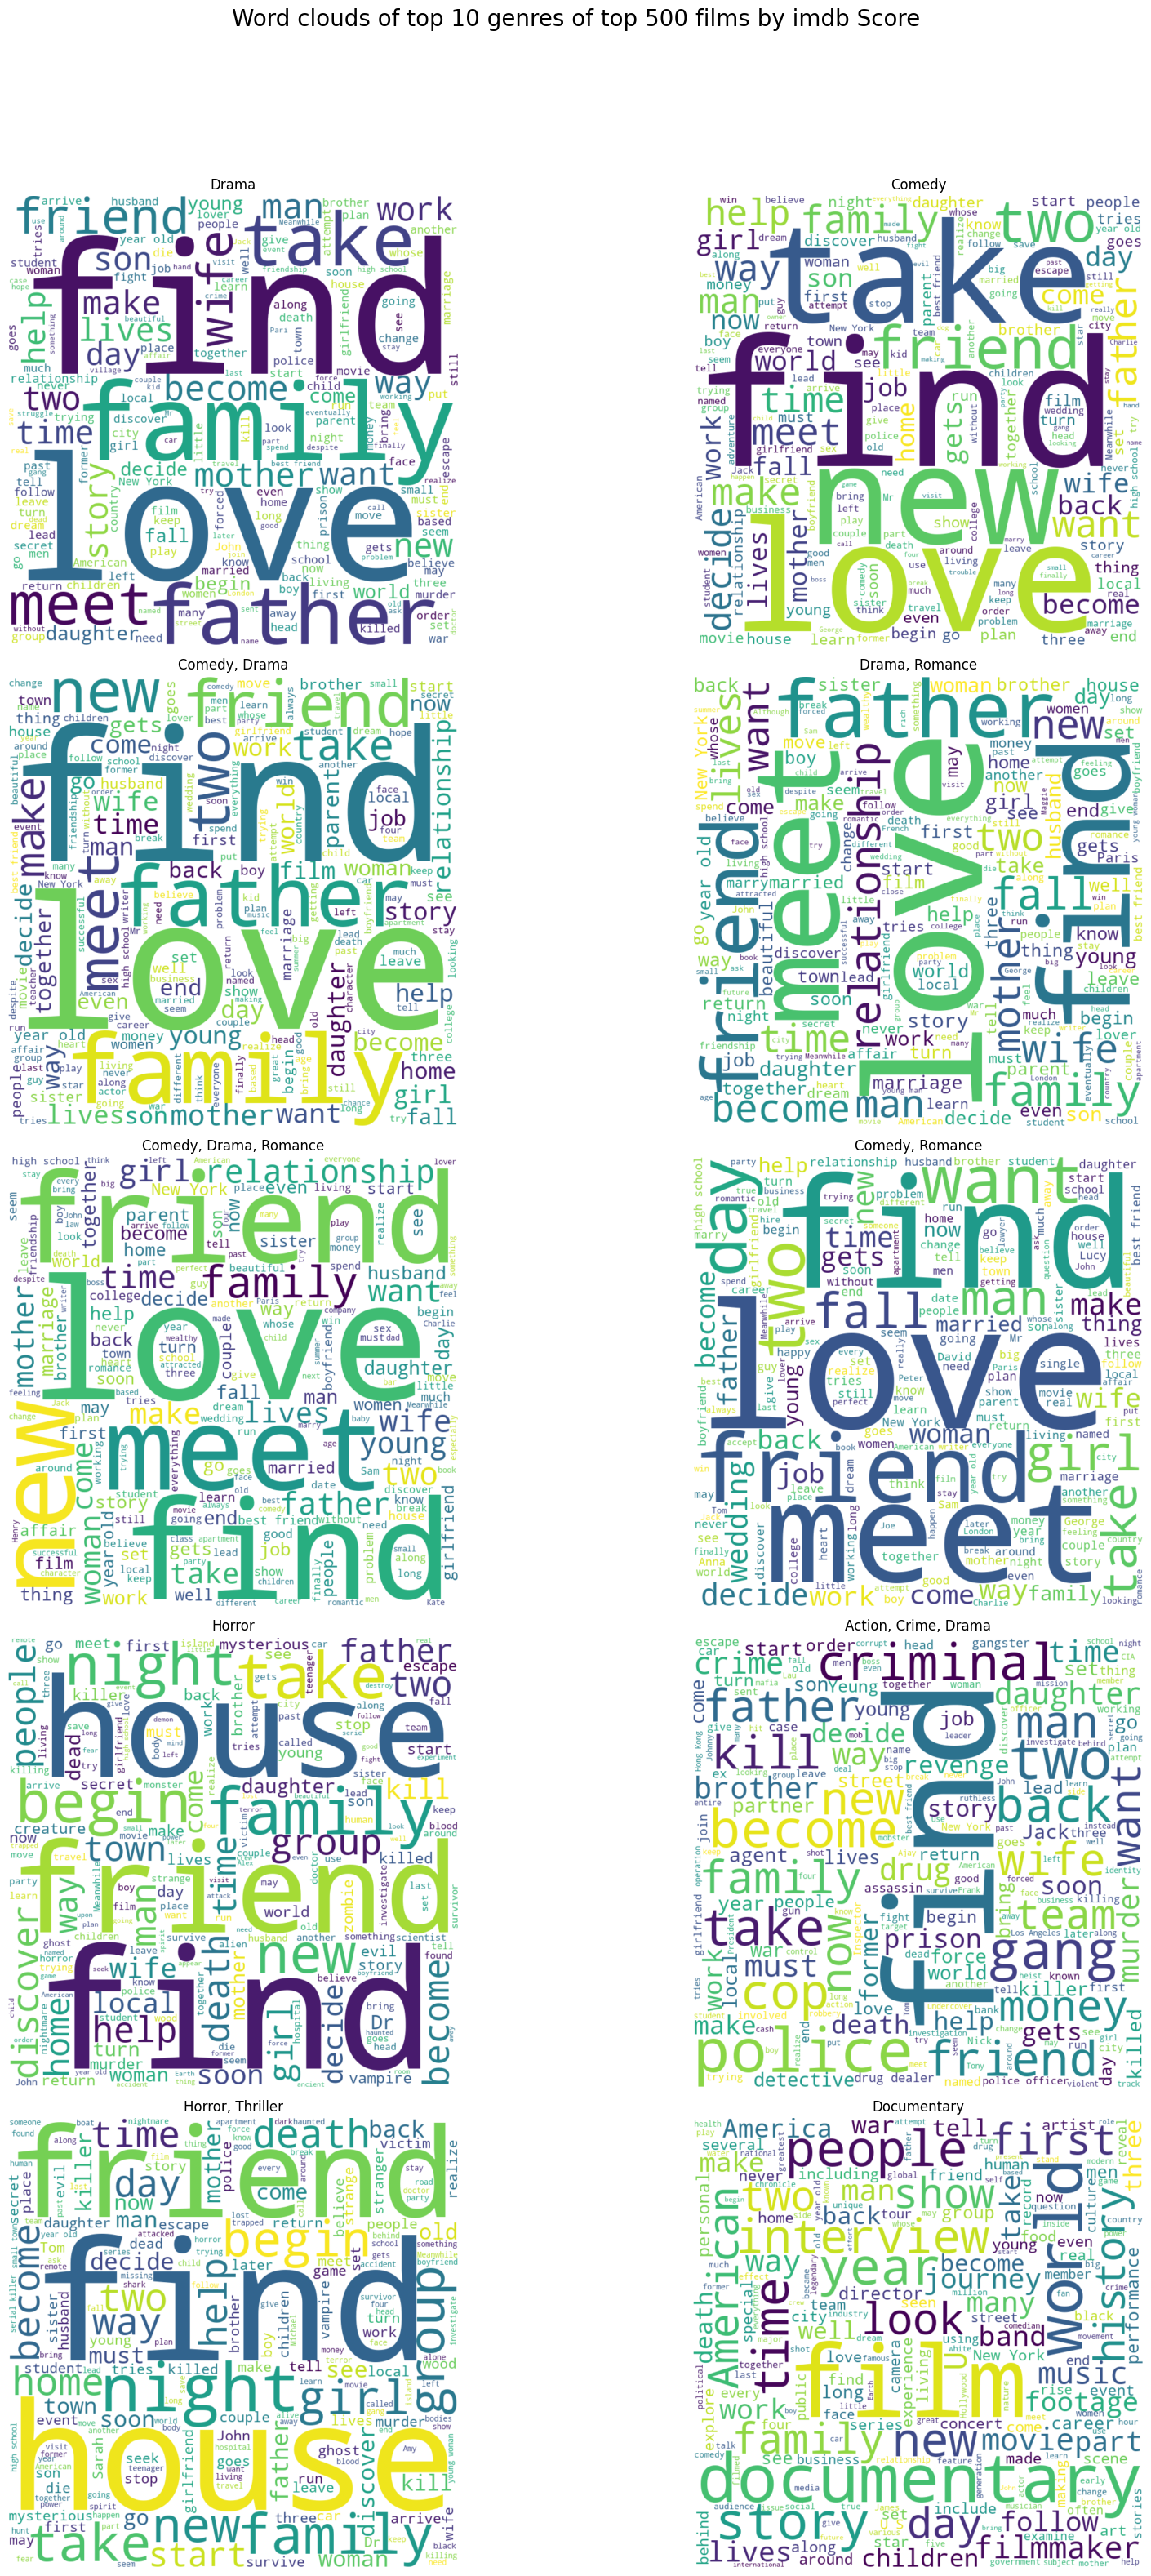

In [8]:

from collections import Counter

# Remove rows with missing values in the 'fullplot', 'genre', and 'imdbRating' columns
df_filtered = df.dropna(subset=['fullplot', 'genre',"imdbRating"])

# Strip leading and trailing whitespace from the 'genre' column
df_filtered['genre'] = df_filtered['genre'].str.strip()

# Select only the 'fullplot', 'genre', and 'imdbRating' columns and sort by imdbRating in descending order
df_filtered = df_filtered[['fullplot', 'genre',"imdbRating"]].sort_values('imdbRating', ascending=False)

# Get the value counts for each genre
value_counts = df['genre'].value_counts()

# Get a list of the top 10 genres
top_genres = value_counts.head(10).index.tolist()

# Create a 5x2 grid of subplots to display the word clouds
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
ax = ax.ravel()
for i, genre in enumerate(top_genres):
    # Get the texts for the current genre
    genre_text = df_filtered[df_filtered['genre'].str.contains(genre)]['fullplot'].str.cat(sep=' ')

    # Create a word cloud for the current genre
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(genre_text)

    # Display the word cloud in the subplot
    ax[i].imshow(wordcloud, interpolation='bilinear')
    # Turn off the axis for the subplot
    ax[i].axis('off')
    # Add a title for the subplot
    ax[i].set_title(genre)

# Add a title for the entire figure
plt.suptitle("Word clouds of top 10 genres of top 500 films by imdb Score", fontsize=20, y=1.05)

# Adjust the layout of the plot
plt.tight_layout()

# Show the plot
plt.show()

Teilt man die Wordclouds auf verschiedene genres auf, kann man schon eher auf das Film Genre schließen und sieht dementsprechend auh erwartete Wörter wie criminal, police etc. bei action, crime, drama.

Extracting Nouns from the Full Plot Column

In [41]:
import nltk
from nltk import word_tokenize
from nltk.tag import pos_tag

# Download necessary resources from nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define a function to extract nouns from a text
def get_nouns(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Tag the words with their part of speech
    tagged_words = pos_tag(words)
    # Extract the nouns from the tagged words
    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    # Return the list of nouns
    return nouns

# Create a copy of the original dataframe
df_nouns = df 

# Remove rows with missing values in the 'fullplot' column
df_nouns = df_nouns.dropna(subset=['fullplot'])

# Apply the get_nouns function to the 'fullplot' column and store the result in a new column 'fullplot_nouns'
df_nouns['fullplot_nouns'] = df_nouns['fullplot'].apply(get_nouns)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\timos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\timos\AppData\Local\Temp\ipykernel_34676\2204132499.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Creating a Word Cloud of the Nouns in the Full Plot for the Top 500 Films by IMDB Rating

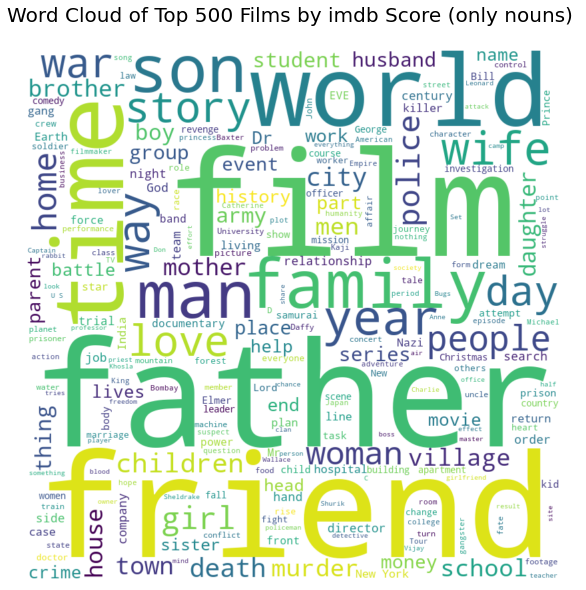

In [42]:
# Get the top 500 films based on imdbRating
df_nouns = df_nouns.nlargest(500, 'imdbRating')

# Concatenate all fullplot_nouns lists into one long string
text = ""
for ele in df_nouns["fullplot_nouns"]:
     text = text + " ".join(ele)

# Generate a word cloud from the text
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=300,
                      min_font_size=10).generate(text)

# Set the figure size and facecolor for the plot
plt.figure(figsize=(8, 8), facecolor=None)

# Display the word cloud in the plot
plt.imshow(wordcloud, interpolation="bilinear")

# Turn off the axis for the plot
plt.axis("off")

# Add a title for the plot
plt.title("Word Cloud of Top 500 Films by imdb Score (only nouns) \n", fontsize=20)

# Adjust the layout of the plot
plt.tight_layout(pad=0)

# Show the plot
plt.show()

### Zusammenfassung

Dieses Data Exploration Notebook hat unter anderem folgende Fragen beantwortet:
- Gibt es besonders gut bewertete Film Genres?
- Sind ätere Filme beliebter?
- Wie wirken sich Veröffentlichungsjahr des Filmes und Genre in Abhänggkeit auf die Bewertungen aus?
- Gibt es Länder die Filme durchschnittlich besonders gut bewerten?

Wir haben gesehen, dass die Filmbewertungen mit der Zeit tendenzeill abgenommen haben. Das kann darauf hin deuten, dass FIlme schlechter geworden sind, muss es aber nicht. Genauso gut können die Menschen mit den Jahren eine höhere Erwartungan Filme haben und sie damit durchschnittlich schlechter bewerten.

Am stetigsten sind Filme vom Genre Dokumentarfilm bewertet. Hier ist die Bewertung auf subjektiver Lage vielleicht nicht ganz so hoch wie für Horror Filme oder Komödien, da sie auf Fakten basieren.

Die Verteilung der IMDB-Ratings liegen alle zwischen 1 und 10. Die meisten jedoch befinden sich zwischen 6.0 und 8.0. Im Violinen Plot habt man ebenfalls breite Verteilungen für bspw. Horrorfilme gesehen, die eben auf einer subjektiven Grundlage beurteilt werden. Die Beurteilungen könnten auch mit Schauspielern oder Regisseuren zu tun haben. Diese Vermutung wurde aber nicht mehr in diesem Notebook untersucht.

Letztendlich lässt sich sagen, dass die IMDb-Bewertungen ein hilfreiches Toll sein kann, um die Qualität von Filmen zu beurteilen- Es lassen sich aber genau so gut Einschränkungen daraus schließen, da die Bewertungen eben subjetiv sind und von vielen Faktoren beeinflusst werden können.

Die Ergebnisse treffen die Erwartungen an diese Data Exploration. Wir häten erwartet, dass in der Wordcloud der Top 500 Filme mehrere Worte gesammelt worden wären, die bspw. auf Horror, Action oder Crime Genren schließen würden. Hier war es sehr sinnvoll, Wordclouds zu erstellen, die nach Genre gruppiert sind.


